In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np
import datetime 
# plotting
from matplotlib import pyplot as plt
import seaborn as sns
#For modelling
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
#Lassocv
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
print(__doc__)
from sklearn import linear_model

Automatically created module for IPython interactive environment


In [2]:
#Reading the excel file into dataframe
df=pd.read_excel("Resort Hotel_Final Analysis.xlsx")

In [137]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_year_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,2015-July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,2015-July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,2015-July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,2015-July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,2015-July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#create an empty DataFrame object to create dummy objects
df_dummy = pd.DataFrame() 

In [7]:
#encode features
def arrival_date_qtr_dummy(df) :
    if (df["arrival_date_month"] in ["January" ,"February", "March"]) :
        return 1
    elif (df["arrival_date_month"] in ["April" ,"May", "June"]) :
        return 2
    elif (df["arrival_date_month"] in ["July" ,"August", "September"]) :
        return 3
    return 4
df_dummy["arrival_date_qtr_dummy"] = df.apply(lambda df:arrival_date_qtr_dummy(df),axis = 1)

In [10]:
def stays_in_weekend_nights_dummy(df) :
    if (df["stays_in_weekend_nights"]== 2) :
        return 1
    return 0
df_dummy["stays_in_weekend_nights_dummy"] = df.apply(lambda df:stays_in_weekend_nights_dummy(df),axis = 1)

In [11]:
def stays_in_week_nights_dummy(df) :
    if (df["stays_in_week_nights"]== 6) :
        return 1
    return 0
df_dummy["stays_in_week_nights_dummy"] = df.apply(lambda df:stays_in_week_nights_dummy(df),axis = 1)

In [12]:
def meal_dummy(df) :
    if (df["meal"]== "HB") :
        return 1
    return 0
df_dummy["meal_dummy"] = df.apply(lambda df:meal_dummy(df),axis = 1)

In [13]:
def country_dummy(df) :
    if (df["country"]== "PRT") :
        return 1
    return 0
df_dummy["country_dummy"] = df.apply(lambda df:country_dummy(df),axis = 1)

In [14]:
def market_segment_dummy(df) :
    if (df["market_segment"]== "Groups") :
        return 42
    elif (df["market_segment"]== "Online TA") :
        return 34
    return 14
df_dummy["market_segment_dummy"] = df.apply(lambda df:market_segment_dummy(df),axis = 1)

In [15]:
def distribution_channel_dummy(df) :
    if (df["distribution_channel"]== "TA/TO") :
        return 1
    return 0
df_dummy["distribution_channel_dummy"] = df.apply(lambda df:distribution_channel_dummy(df),axis = 1)

In [16]:
def assigned_room_type_dummy(df) :
    if (df["assigned_room_type"]== "A") :
        return 1
    return 0
df_dummy["assigned_room_type_dummy"] = df.apply(lambda df:assigned_room_type_dummy(df),axis = 1)

In [17]:
def agent_dummy(df) :
    if (df["agent"]== 240) :
        return 1
    return 0
df_dummy["agent_dummy"] = df.apply(lambda df:agent_dummy(df),axis = 1)

In [18]:
def customer_type_dummy(df) :
    if (df["customer_type"]== "Transient") :
        return 1
    return 0
df_dummy["customer_type_dummy"] = df.apply(lambda df:customer_type_dummy(df),axis = 1)

In [19]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   arrival_date_qtr_dummy         40060 non-null  int64
 1   stays_in_weekend_nights_dummy  40060 non-null  int64
 2   stays_in_week_nights_dummy     40060 non-null  int64
 3   meal_dummy                     40060 non-null  int64
 4   country_dummy                  40060 non-null  int64
 5   market_segment_dummy           40060 non-null  int64
 6   distribution_channel_dummy     40060 non-null  int64
 7   assigned_room_type_dummy       40060 non-null  int64
 8   agent_dummy                    40060 non-null  int64
 9   customer_type_dummy            40060 non-null  int64
dtypes: int64(10)
memory usage: 3.1 MB


In [20]:
df_dummy.head()

,arrival_date_qtr_dummy,stays_in_weekend_nights_dummy,stays_in_week_nights_dummy,meal_dummy,country_dummy,market_segment_dummy,distribution_channel_dummy,assigned_room_type_dummy,agent_dummy,customer_type_dummy
0,3,0,0,0,1,14,0,0,0,1
1,3,0,0,0,1,14,0,0,0,1
2,3,0,0,0,0,14,0,0,0,1
3,3,0,0,0,0,14,0,1,0,1
4,3,0,0,0,0,34,1,1,1,1


In [21]:
final_df = pd.concat([df, df_dummy], axis=1)

In [22]:
final_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_year_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,arrival_date_qtr_dummy,stays_in_weekend_nights_dummy,stays_in_week_nights_dummy,meal_dummy,country_dummy,market_segment_dummy,distribution_channel_dummy,assigned_room_type_dummy,agent_dummy,customer_type_dummy
0,Resort Hotel,0,342,2015,July,2015-July,27,1,0,0,...,3,0,0,0,1,14,0,0,0,1
1,Resort Hotel,0,737,2015,July,2015-July,27,1,0,0,...,3,0,0,0,1,14,0,0,0,1
2,Resort Hotel,0,7,2015,July,2015-July,27,1,0,1,...,3,0,0,0,0,14,0,0,0,1
3,Resort Hotel,0,13,2015,July,2015-July,27,1,0,1,...,3,0,0,0,0,14,0,1,0,1
4,Resort Hotel,0,14,2015,July,2015-July,27,1,0,2,...,3,0,0,0,0,34,1,1,1,1


In [23]:
#Drop columns not needed for the regression from the final dataset

final_df=final_df.drop(['hotel',
               'arrival_date_month', 
               'arrival_date_year_month', 
               'arrival_date_week_number',
               'arrival_date_day_of_month',
               'meal',
               'country',
               'market_segment',
               'distribution_channel',
               'reserved_room_type',
               'assigned_room_type',
               'deposit_type',
               'agent',
               'company',
               'customer_type',
               'reservation_status_date'], axis=1)

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     40060 non-null  int64  
 1   lead_time                       40060 non-null  int64  
 2   arrival_date_year               40060 non-null  int64  
 3   stays_in_weekend_nights         40060 non-null  int64  
 4   stays_in_week_nights            40060 non-null  int64  
 5   adults                          40060 non-null  int64  
 6   children                        40060 non-null  int64  
 7   babies                          40060 non-null  int64  
 8   is_repeated_guest               40060 non-null  int64  
 9   previous_cancellations          40060 non-null  int64  
 10  previous_bookings_not_canceled  40060 non-null  int64  
 11  booking_changes                 40060 non-null  int64  
 12  days_in_waiting_list            

In [25]:
#convert reservation status datatype object to int
final_df.reservation_status = final_df.reservation_status.replace({"Canceled":1,"Check-Out":0})

In [26]:
#Check Missing Values
print("\nMissing values:", final_df.isnull().sum().values.sum())


Missing values: 0


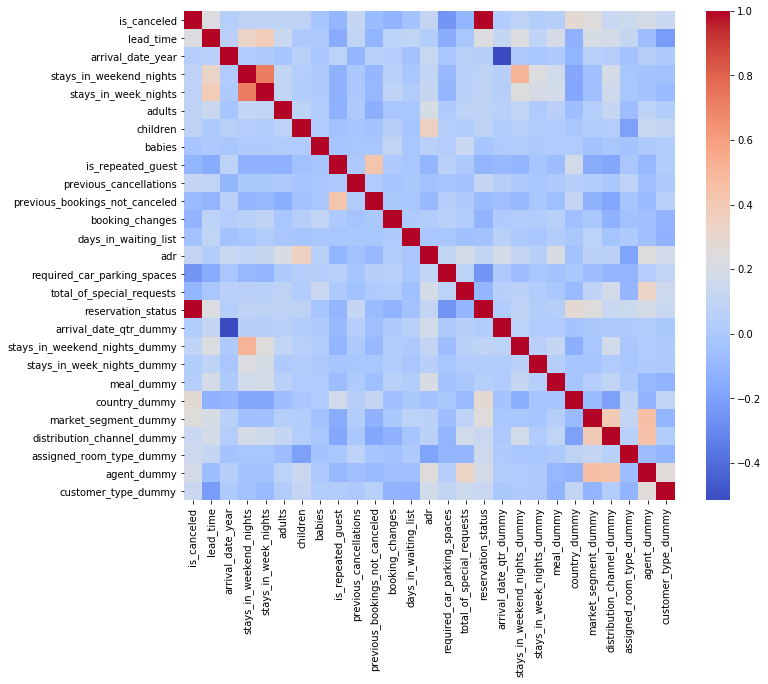

In [27]:
#EDA on fields 
#correlation
correlation = final_df.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlation,cmap='coolwarm')

In [28]:
final_df=final_df.drop(['reservation_status'],axis=1) # as it is highly correlated

In [29]:
#Check for class imbalance
final_df['is_canceled'].value_counts()

0    28938
1    11122
Name: is_canceled, dtype: int64

In [126]:
#Input and output variables
X,y = final_df.drop('is_canceled',axis=1),final_df['is_canceled']

In [55]:
#Split the data into 70-30 train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=50)

In [56]:
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((28042, 25), (12018, 25), (28042,), (12018,))

In [109]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

0.9013146946247296

In [112]:
#Feature Importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                                importance
lead_time                         0.197040
adr                               0.122346
country_dummy                     0.118083
required_car_parking_spaces       0.059419
total_of_special_requests         0.055745
stays_in_week_nights              0.055607
market_segment_dummy              0.049624
agent_dummy                       0.048778
arrival_date_year                 0.042996
customer_type_dummy               0.030191
previous_cancellations            0.030157
stays_in_weekend_nights           0.029025
arrival_date_qtr_dummy            0.028967
booking_changes                   0.027010
assigned_room_type_dummy          0.020582
adults                            0.017659
distribution_channel_dummy        0.014578
meal_dummy                        0.012696
children                          0.011572
stays_in_weekend_nights_dummy     0.010175
previous_bookings_not_canceled    0.007487
is_repeated_guest                 0.003332
stays_in_we

In [113]:
#Logistic Regression
#Importing libraries 
import statsmodels.api as sm 
   
# building the model and fitting the data 
log_reg = sm.Logit(y_train, X_train).fit() 


# printing the summary table 
print(log_reg.summary())


         Current function value: 0.348417
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                28042
Model:                          Logit   Df Residuals:                    28017
Method:                           MLE   Df Model:                           24
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.4098
Time:                        21:26:12   Log-Likelihood:                -9770.3
converged:                      False   LL-Null:                       -16555.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                          0.0062      0.000     27.873      0.000       0.006       0.007
arriv

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [33]:
#forward selection
# Build logistic rregression to use in feature selection
#Forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr = LogisticRegression(max_iter=20000)

# Build step forward feature selection
sfs1 = sfs(lr,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=3)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.4s finished

[2020-11-23 14:47:19] Features: 1/10 -- score: 0.7413165157621068[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    3.5s finished

[2020-11-23 14:47:23] Features: 2/10 -- score: 0.7439554209217181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    4.1s finished

[2020-11-23 14:47:27] Features: 3/10 -- score: 0.7444903442857383[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [35]:
# Features list that were selected
feature_cols = list(sfs1.k_feature_idx_)
print(feature_cols)

[0, 1, 4, 8, 9, 13, 16, 17, 19, 20]


In [229]:
# Build full logistic regression model with selected features using forward selection
#Logistic regressiom
logreg1 = LogisticRegression(max_iter=20000)
logreg1.fit(X_train.iloc[:, feature_cols], y_train)
y_pred = logreg1.predict(X_test.iloc[:, feature_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred))

Testing accuracy on selected features: 0.813


In [37]:
from sklearn.metrics import confusion_matrix
logmatx = confusion_matrix(y_test, y_pred)
print(logmatx)

[[7960  711]
 [1532 1815]]


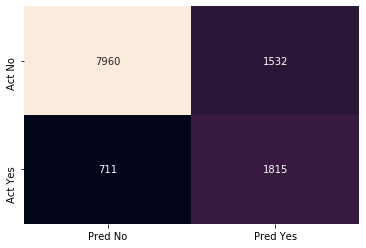

In [38]:
sns.heatmap(logmatx.T, annot=True, fmt='d', cbar=False,
          xticklabels=['Pred No','Pred Yes'],
          yticklabels=['Act No','Act Yes'] )

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      8671
           1       0.72      0.54      0.62      3347

    accuracy                           0.81     12018
   macro avg       0.78      0.73      0.75     12018
weighted avg       0.81      0.81      0.80     12018



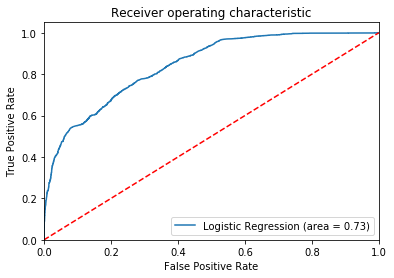

In [259]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg1_roc_auc = roc_auc_score(y_test, logreg1.predict(X_test.iloc[:, feature_cols]))
fpr, tpr, thresholds = roc_curve(y_test, logreg1.predict_proba(X_test.iloc[:, feature_cols])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [231]:
# Build Random Forest model with selected features using forward selection
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
rf1.fit(X_train.iloc[:, feature_cols], y_train)

y_train_pred = rf1.predict(X_train.iloc[:, feature_cols])
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = rf1.predict(X_test.iloc[:, feature_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.818
Testing accuracy on selected features: 0.818


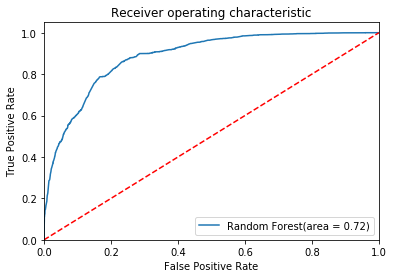

In [260]:
#ROC for Ransdom Forest
rf1_roc_auc = roc_auc_score(y_test, rf1.predict(X_test.iloc[:, feature_cols]))
fpr, tpr, thresholds = roc_curve(y_test, rf1.predict_proba(X_test.iloc[:, feature_cols])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest(area = %0.2f)' % rf1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [234]:
# Build Decision Tree model with selected features using forward selection
#Decision tree
from sklearn.tree import DecisionTreeClassifier
desctree1 = DecisionTreeClassifier(max_depth=3)
desctree1.fit(X_train.iloc[:, feature_cols], y_train)
y_pred_desct = desctree1.predict(X_test.iloc[:, feature_cols])

[Text(581.25, 990.9375, 'X[8] <= 0.5\ngini = 0.401\nsamples = 28042\nvalue = [20267, 7775]'),
 Text(290.625, 707.8125, 'X[9] <= 24.0\ngini = 0.275\nsamples = 15749\nvalue = [13155, 2594]'),
 Text(145.3125, 424.6875, 'X[3] <= 0.5\ngini = 0.06\nsamples = 5751\nvalue = [5573, 178]'),
 Text(72.65625, 141.5625, 'gini = 0.053\nsamples = 5720\nvalue = [5564, 156]'),
 Text(217.96875, 141.5625, 'gini = 0.412\nsamples = 31\nvalue = [9, 22]'),
 Text(435.9375, 424.6875, 'X[5] <= 0.5\ngini = 0.367\nsamples = 9998\nvalue = [7582, 2416]'),
 Text(363.28125, 141.5625, 'gini = 0.405\nsamples = 8562\nvalue = [6146, 2416]'),
 Text(508.59375, 141.5625, 'gini = 0.0\nsamples = 1436\nvalue = [1436, 0]'),
 Text(871.875, 707.8125, 'X[0] <= 17.5\ngini = 0.488\nsamples = 12293\nvalue = [7112, 5181]'),
 Text(726.5625, 424.6875, 'X[0] <= 7.5\ngini = 0.228\nsamples = 4891\nvalue = [4249, 642]'),
 Text(653.90625, 141.5625, 'gini = 0.164\nsamples = 3763\nvalue = [3425, 338]'),
 Text(799.21875, 141.5625, 'gini = 0.394\

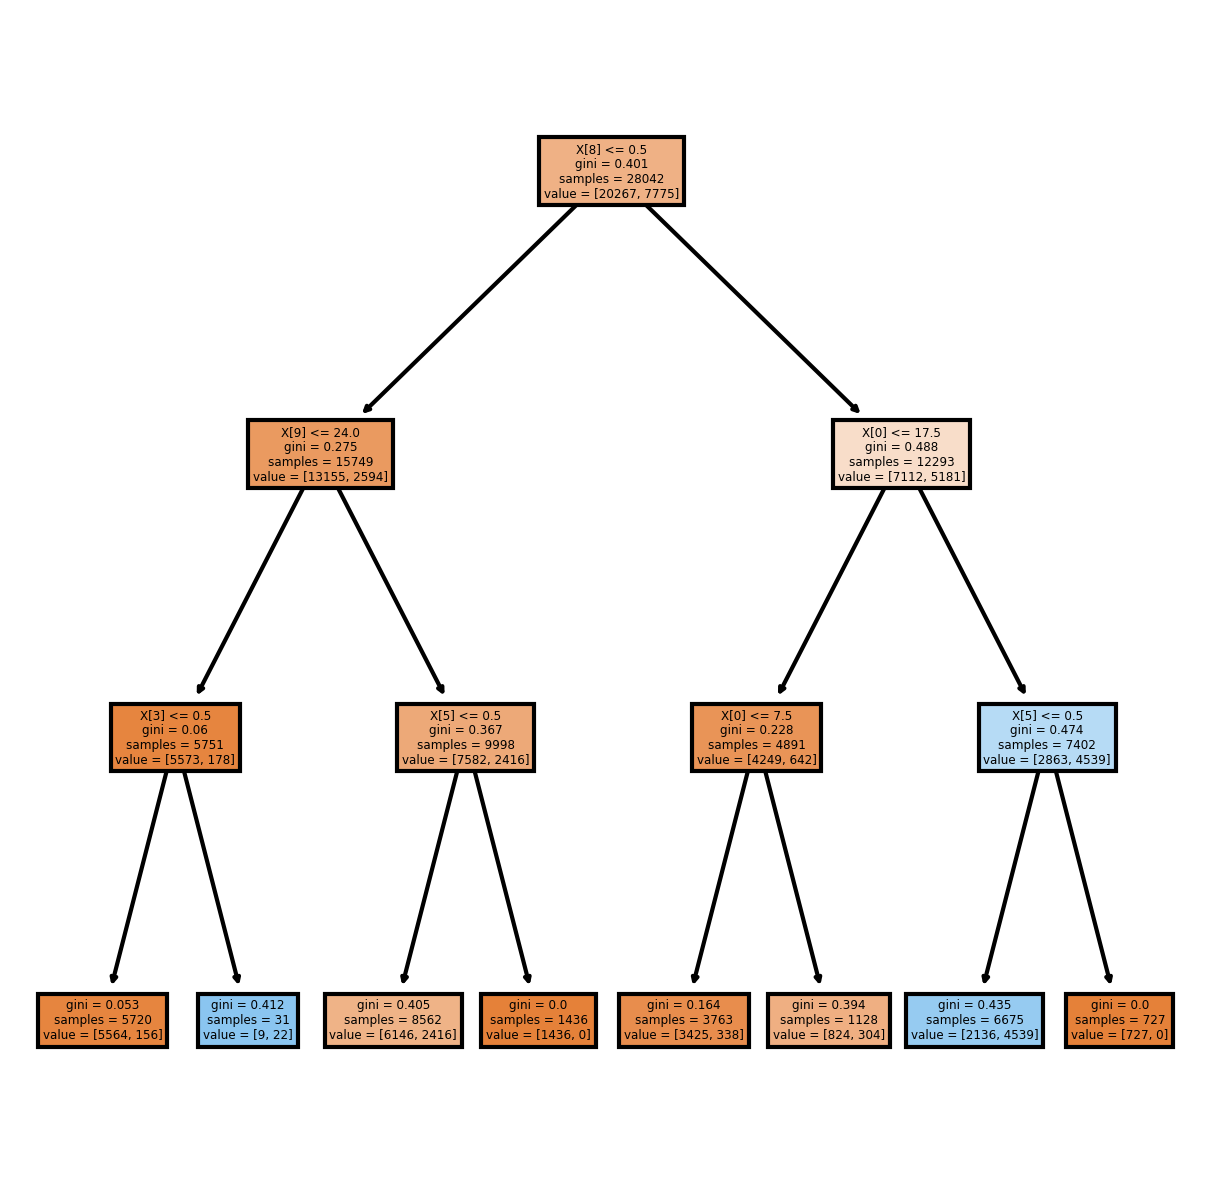

In [235]:
#Plot the decision tree
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(desctree1, filled=True)

In [236]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_desct))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_desct))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_desct)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_desct))

Mean Absolute Error: 0.194
Mean Squared Error: 0.194
Root Mean Squared Error: 0.441
Testing accuracy on selected features: 0.806


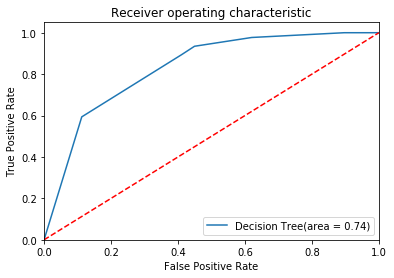

In [261]:
#ROC for Decision Tree
desctree1_roc_auc = roc_auc_score(y_test, desctree1.predict(X_test.iloc[:, feature_cols]))
fpr, tpr, thresholds = roc_curve(y_test, desctree1.predict_proba(X_test.iloc[:, feature_cols])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree(area = %0.2f)' % desctree1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [238]:
# Build XGBoost Classifier model with selected features using forward selection
#Xgbclassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgbc1 = xgb.XGBClassifier(objective='reg:logistic')
xgbc1.fit(X_train.iloc[:, feature_cols],y_train)
y_pred_xgbc = xgbc1.predict(X_test.iloc[:, feature_cols])

In [239]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_xgbc))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_xgbc))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbc)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_xgbc))

Mean Absolute Error: 0.154
Mean Squared Error: 0.154
Root Mean Squared Error: 0.392
Testing accuracy on selected features: 0.846


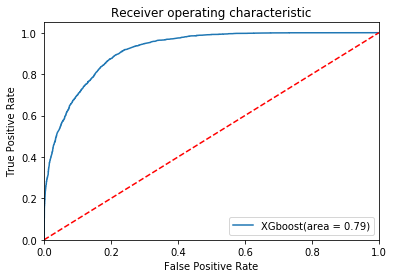

In [262]:
#ROC for XGboost
xgbc1_roc_auc = roc_auc_score(y_test, xgbc1.predict(X_test.iloc[:, feature_cols]))
fpr, tpr, thresholds = roc_curve(y_test, xgbc1.predict_proba(X_test.iloc[:, feature_cols])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGboost(area = %0.2f)' % xgbc1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [241]:
# Build Naive Bayes model with selected features using forward selection
from sklearn.naive_bayes import BernoulliNB
gnb1 = BernoulliNB()
gnb1.fit(X_train.iloc[:, feature_cols],y_train)
y_pred_gnb = gnb1.predict(X_test.iloc[:, feature_cols])

In [192]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.iloc[:, feature_cols].shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 12018 points : 2663


In [193]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 77.84157097686804


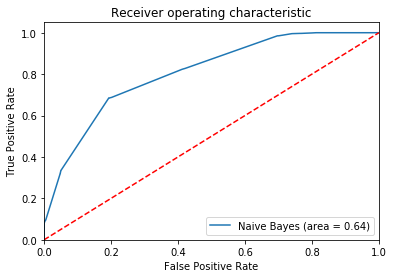

In [263]:
#ROC for Naive Bayes
gnb1_roc_auc = roc_auc_score(y_test, gnb1.predict(X_test.iloc[:, feature_cols]))
fpr, tpr, thresholds = roc_curve(y_test, gnb1.predict_proba(X_test.iloc[:, feature_cols])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % gnb1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [65]:
#Backward feature selection
# Build logistic rregression to use in feature selection
#Backward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lrb = LogisticRegression(solver='lbfgs',max_iter=90000)

# Build step forward feature selection
sfs2 = sfs(lrb,
           k_features=15, 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=2)

# Perform SFFS
sfs2 = sfs2.fit(X_train, y_train)

In [66]:
 # Features list that were selected
feature_cols_back = list(sfs2.k_feature_idx_)
print(feature_cols_back)

[0, 4, 7, 8, 10, 11, 12, 13, 14, 16, 19, 20, 22, 23, 24]


In [244]:
# Build full logistic regression model with selected features using backward selection
#Logistic regressiom
logreg2 = LogisticRegression(max_iter=20000)
logreg2.fit(X_train.iloc[:, feature_cols_back], y_train)
y_pred = logreg2.predict(X_test.iloc[:, feature_cols_back])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred))

Testing accuracy on selected features: 0.830


In [69]:
from sklearn.metrics import confusion_matrix
logmatx = confusion_matrix(y_test, y_pred)
print(logmatx)

[[7919  752]
 [1295 2052]]


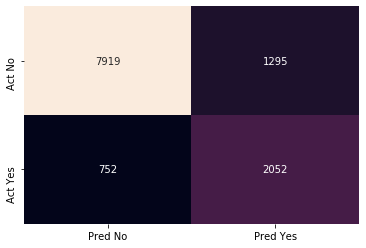

In [70]:
sns.heatmap(logmatx.T, annot=True, fmt='d', cbar=False,
          xticklabels=['Pred No','Pred Yes'],
          yticklabels=['Act No','Act Yes'] )

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      8671
           1       0.73      0.61      0.67      3347

    accuracy                           0.83     12018
   macro avg       0.80      0.76      0.78     12018
weighted avg       0.82      0.83      0.82     12018



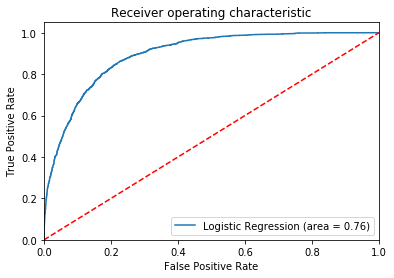

In [264]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg2_roc_auc = roc_auc_score(y_test, logreg2.predict(X_test.iloc[:, feature_cols_back]))
fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(X_test.iloc[:, feature_cols_back])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [246]:
# Build Random Forest model with selected features using backward selection
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
rf2.fit(X_train.iloc[:, feature_cols_back], y_train)

y_train_pred = rf2.predict(X_train.iloc[:, feature_cols_back])
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = rf2.predict(X_test.iloc[:, feature_cols_back])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.818
Testing accuracy on selected features: 0.817


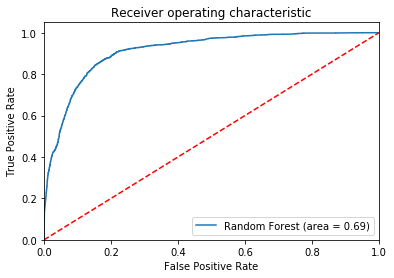

In [247]:
#ROC for Random forest
rf2_roc_auc = roc_auc_score(y_test, rf2.predict(X_test.iloc[:, feature_cols_back]))
fpr, tpr, thresholds = roc_curve(y_test, rf2.predict_proba(X_test.iloc[:, feature_cols_back])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [248]:
# Build Decision Tree model with selected features using backward selection
#Decision tree
from sklearn.tree import DecisionTreeClassifier
desctree2 = DecisionTreeClassifier(max_depth=3)
desctree2.fit(X_train.iloc[:, feature_cols_back], y_train)
y_pred_desct = desctree2.predict(X_test.iloc[:, feature_cols_back])

[Text(581.25, 990.9375, 'X[10] <= 0.5\ngini = 0.401\nsamples = 28042\nvalue = [20267, 7775]'),
 Text(290.625, 707.8125, 'X[13] <= 0.5\ngini = 0.275\nsamples = 15749\nvalue = [13155, 2594]'),
 Text(145.3125, 424.6875, 'X[3] <= 0.5\ngini = 0.083\nsamples = 9462\nvalue = [9050, 412]'),
 Text(72.65625, 141.5625, 'gini = 0.05\nsamples = 9280\nvalue = [9041, 239]'),
 Text(217.96875, 141.5625, 'gini = 0.094\nsamples = 182\nvalue = [9, 173]'),
 Text(435.9375, 424.6875, 'X[8] <= 0.5\ngini = 0.453\nsamples = 6287\nvalue = [4105, 2182]'),
 Text(363.28125, 141.5625, 'gini = 0.49\nsamples = 2022\nvalue = [869, 1153]'),
 Text(508.59375, 141.5625, 'gini = 0.366\nsamples = 4265\nvalue = [3236, 1029]'),
 Text(871.875, 707.8125, 'X[0] <= 17.5\ngini = 0.488\nsamples = 12293\nvalue = [7112, 5181]'),
 Text(726.5625, 424.6875, 'X[0] <= 7.5\ngini = 0.228\nsamples = 4891\nvalue = [4249, 642]'),
 Text(653.90625, 141.5625, 'gini = 0.164\nsamples = 3763\nvalue = [3425, 338]'),
 Text(799.21875, 141.5625, 'gini = 

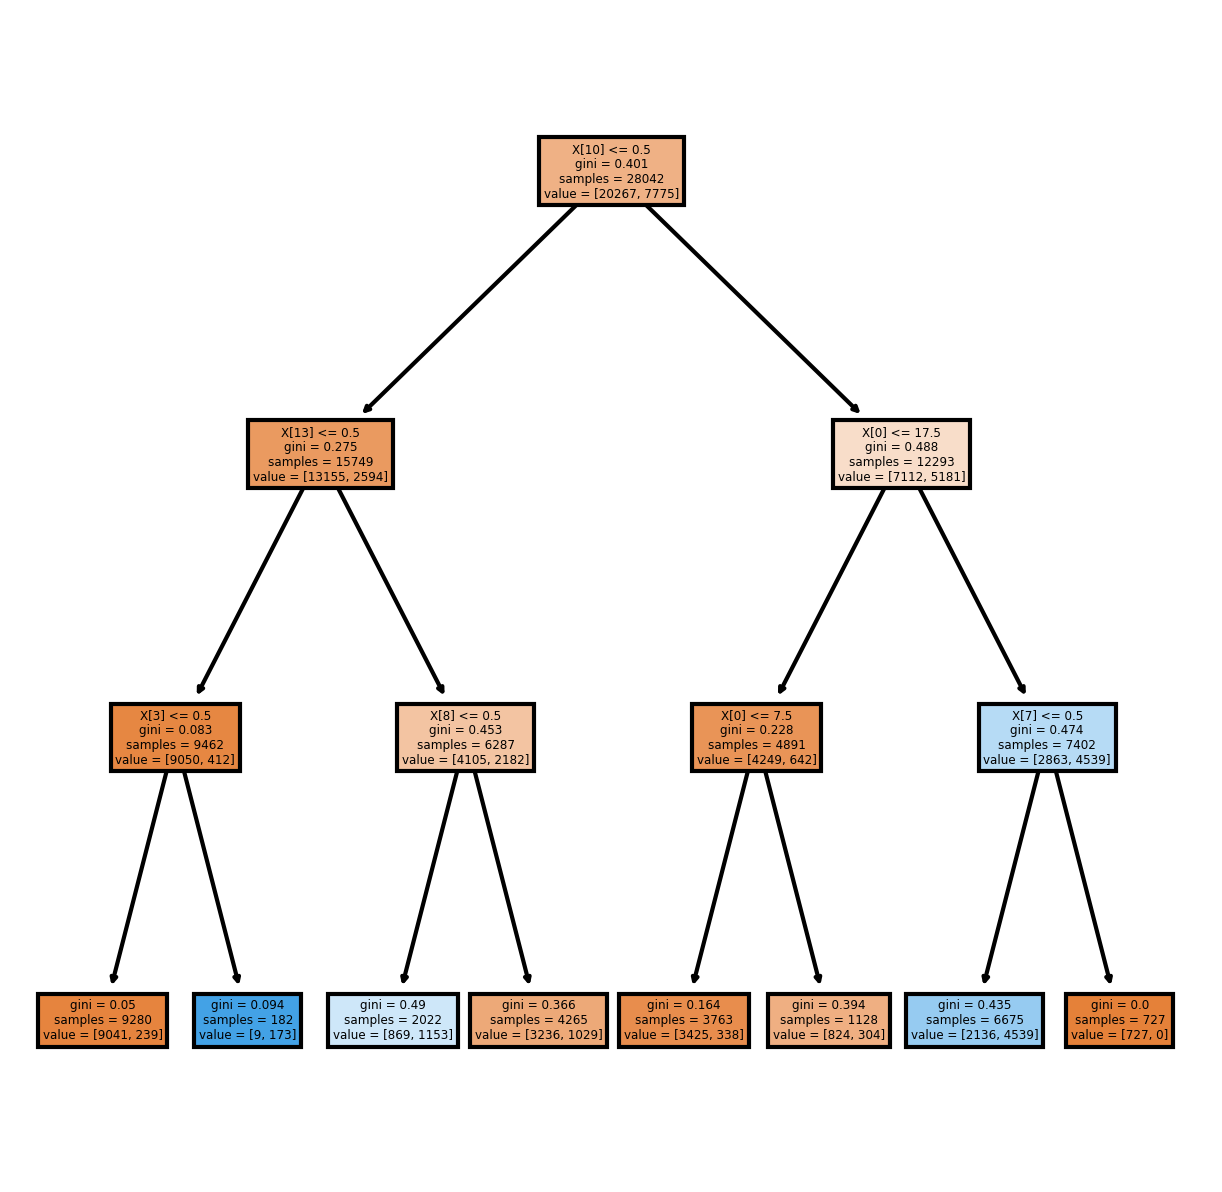

In [249]:
#Plot the decision tree
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(desctree2, filled=True)

In [250]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_desct))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_desct))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_desct)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_desct))

Mean Absolute Error: 0.176
Mean Squared Error: 0.176
Root Mean Squared Error: 0.420
Testing accuracy on selected features: 0.824


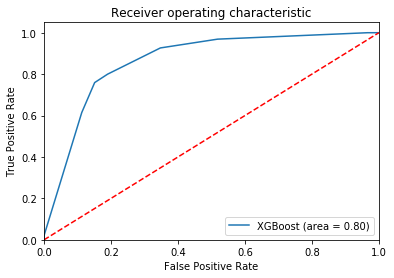

In [265]:
#ROC for Decision tree
desctree2_roc_auc = roc_auc_score(y_test, desctree2.predict(X_test.iloc[:, feature_cols_back]))
fpr, tpr, thresholds = roc_curve(y_test, desctree2.predict_proba(X_test.iloc[:, feature_cols_back])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % desctree2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [252]:
# Build XGBoost Classifier model with selected features using backward selection
#Xgbclassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgbc2 = xgb.XGBClassifier(objective='reg:logistic')
xgbc2.fit(X_train.iloc[:, feature_cols_back],y_train)
y_pred_xgbc = xgbc2.predict(X_test.iloc[:, feature_cols_back])

In [253]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_xgbc))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_xgbc))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbc)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_xgbc))

Mean Absolute Error: 0.118
Mean Squared Error: 0.118
Root Mean Squared Error: 0.344
Testing accuracy on selected features: 0.882


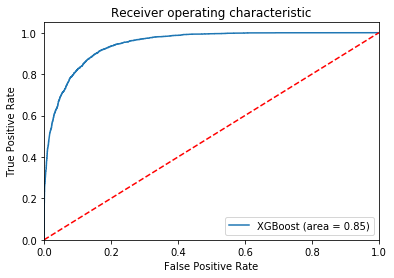

In [266]:
#ROC for XGBoost
xgbc2_roc_auc = roc_auc_score(y_test, xgbc2.predict(X_test.iloc[:, feature_cols_back]))
fpr, tpr, thresholds = roc_curve(y_test, xgbc2.predict_proba(X_test.iloc[:, feature_cols_back])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgbc2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [255]:
# Build Naive Bayes model with selected features using forward selection
from sklearn.naive_bayes import BernoulliNB
gnb2 = BernoulliNB()
gnb2.fit(X_train.iloc[:, feature_cols_back],y_train)
y_pred_gnb = gnb2.predict(X_test.iloc[:, feature_cols_back])

In [256]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.iloc[:, feature_cols_back].shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 12018 points : 2485


In [257]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 79.32268264270262


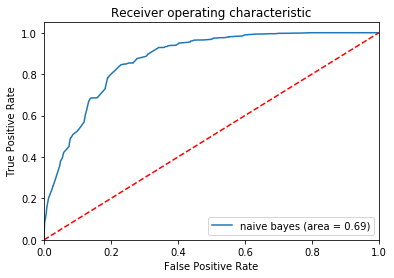

In [267]:
#ROC for naive Bayes
gnb2_roc_auc = roc_auc_score(y_test, gnb2.predict(X_test.iloc[:, feature_cols_back]))
fpr, tpr, thresholds = roc_curve(y_test, gnb2.predict_proba(X_test.iloc[:, feature_cols_back])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='naive bayes (area = %0.2f)' % gnb2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [128]:
#Lasso-Feature selection
names=final_df.columns.tolist()
names.remove('is_canceled')

In [294]:
# Create a function called lasso,
def lasso(alphas):
    # Create an empty data frame
    dfs = pd.DataFrame()
    
    # Create a column of feature names
    dfs['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        #lasso = Lasso(alpha=alpha)---this is using OLS model
        lasso = linear_model.Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X,y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        dfs[column_name] = lasso.coef_
        
    # Return the datafram    
    return dfs

In [302]:
# Run the function called, Lasso
out=lasso([0.01,0.02,0.05,0.1,0.2,0.5,1,1.5])
out

,Feature Name,Alpha = 0.010000,Alpha = 0.020000,Alpha = 0.050000,Alpha = 0.100000,Alpha = 0.200000,Alpha = 0.500000,Alpha = 1.000000,Alpha = 1.500000
0,lead_time,0.000956,0.000953,0.000925,0.000870,0.000867,0.000892,0.000936,0.000891
1,arrival_date_year,0.008439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,stays_in_weekend_nights,0.007749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,stays_in_week_nights,0.005820,0.005093,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
4,adults,0.004025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,children,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,babies,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
7,is_repeated_guest,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
8,previous_cancellations,0.018443,0.013986,0.001458,0.000000,0.000000,0.000000,0.000000,0.000000
9,previous_bookings_not_canceled,-0.007441,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [303]:
out_lasso= out[out['Alpha = 0.020000']!= 0]

In [304]:
df1=out_lasso['Feature Name']

In [305]:
# Selecting only the features identified by Lasso 
df1

0                       lead_time
3            stays_in_week_nights
8          previous_cancellations
10                booking_changes
11           days_in_waiting_list
12                            adr
13    required_car_parking_spaces
14      total_of_special_requests
19                  country_dummy
20           market_segment_dummy
23                    agent_dummy
24            customer_type_dummy
Name: Feature Name, dtype: object

In [306]:
X_train_lasso= X_train.filter (['lead_time','stays_in_week_nights','previous_cancellations','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','country_dummy','market_segment_dummy','agent_dummy','customer_type_dummy'])

In [307]:
X_test_lasso= X_test.filter (['lead_time','stays_in_week_nights','previous_cancellations','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','country_dummy','market_segment_dummy','agent_dummy','customer_type_dummy'])

In [308]:
# Build full logistic regression model with selected features using Lasso selection
#Logistic regressiom
logreg3 = LogisticRegression(max_iter=20000)
logreg3.fit(X_train_lasso, y_train)
y_pred_2 = logreg3.predict(X_test_lasso)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_2))

Testing accuracy on selected features: 0.822


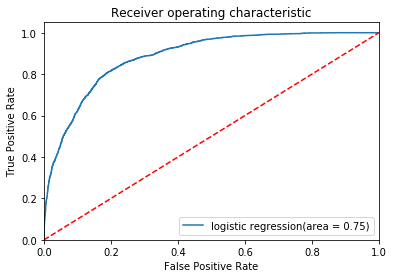

In [309]:
#ROC for logistic regression
logreg3_roc_auc = roc_auc_score(y_test, logreg3.predict(X_test_lasso))
fpr, tpr, thresholds = roc_curve(y_test, logreg3.predict_proba(X_test_lasso)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='logistic regression(area = %0.2f)' % logreg3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [310]:
# Build Random Forest model with selected features using backward selection
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
rf3.fit(X_train_lasso, y_train)

y_train_pred = rf3.predict(X_train_lasso)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = rf3.predict(X_test_lasso)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.822
Testing accuracy on selected features: 0.822


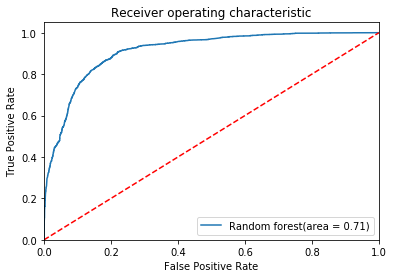

In [311]:
#ROC for Random Forest Tree
rf3_roc_auc = roc_auc_score(y_test, rf3.predict(X_test_lasso))
fpr, tpr, thresholds = roc_curve(y_test, rf3.predict_proba(X_test_lasso)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest(area = %0.2f)' % rf3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [312]:
# Build Decision Tree model with selected features using backward selection
#Decision tree
from sklearn.tree import DecisionTreeClassifier
desctree3 = DecisionTreeClassifier(max_depth=3)
desctree3.fit(X_train_lasso, y_train)
y_pred_desct = desctree3.predict(X_test_lasso)

[Text(581.25, 990.9375, 'X[8] <= 0.5\ngini = 0.401\nsamples = 28042\nvalue = [20267, 7775]'),
 Text(290.625, 707.8125, 'X[10] <= 0.5\ngini = 0.275\nsamples = 15749\nvalue = [13155, 2594]'),
 Text(145.3125, 424.6875, 'X[2] <= 0.5\ngini = 0.083\nsamples = 9462\nvalue = [9050, 412]'),
 Text(72.65625, 141.5625, 'gini = 0.05\nsamples = 9280\nvalue = [9041, 239]'),
 Text(217.96875, 141.5625, 'gini = 0.094\nsamples = 182\nvalue = [9, 173]'),
 Text(435.9375, 424.6875, 'X[7] <= 0.5\ngini = 0.453\nsamples = 6287\nvalue = [4105, 2182]'),
 Text(363.28125, 141.5625, 'gini = 0.49\nsamples = 2022\nvalue = [869, 1153]'),
 Text(508.59375, 141.5625, 'gini = 0.366\nsamples = 4265\nvalue = [3236, 1029]'),
 Text(871.875, 707.8125, 'X[0] <= 17.5\ngini = 0.488\nsamples = 12293\nvalue = [7112, 5181]'),
 Text(726.5625, 424.6875, 'X[0] <= 7.5\ngini = 0.228\nsamples = 4891\nvalue = [4249, 642]'),
 Text(653.90625, 141.5625, 'gini = 0.164\nsamples = 3763\nvalue = [3425, 338]'),
 Text(799.21875, 141.5625, 'gini = 0

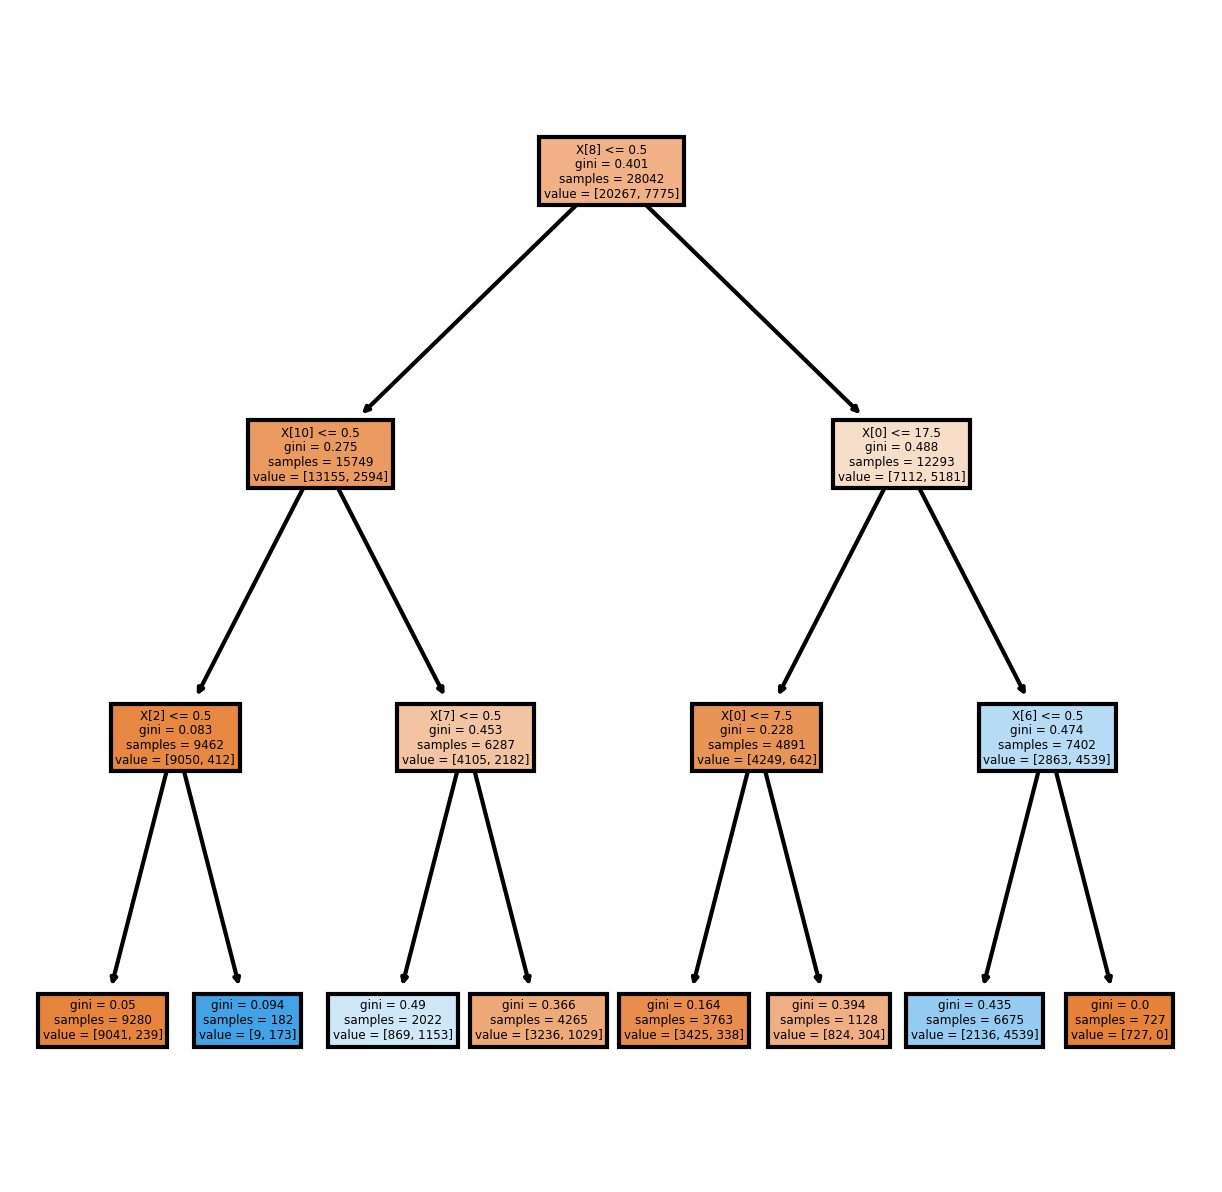

In [313]:
#Plot the decision tree
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(desctree3, filled=True)

In [314]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_desct))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_desct))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_desct)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_desct))

Mean Absolute Error: 0.176
Mean Squared Error: 0.176
Root Mean Squared Error: 0.420
Testing accuracy on selected features: 0.824


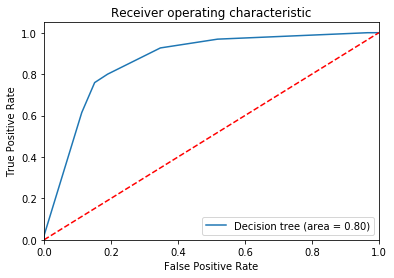

In [315]:
#ROC for Decision Tree
desctree3_roc_auc = roc_auc_score(y_test, desctree3.predict(X_test_lasso))
fpr, tpr, thresholds = roc_curve(y_test, desctree3.predict_proba(X_test_lasso)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % desctree3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [316]:
# Build XGBoost Classifier model with selected features using backward selection
#Xgbclassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgbc3 = xgb.XGBClassifier(objective='reg:logistic')
xgbc3.fit(X_train_lasso,y_train)
y_pred_xgbc = xgbc3.predict(X_test_lasso)

In [317]:
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred_xgbc))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred_xgbc))
print('Root Mean Squared Error: %.3f' %  np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbc)))
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_pred_xgbc))

Mean Absolute Error: 0.119
Mean Squared Error: 0.119
Root Mean Squared Error: 0.345
Testing accuracy on selected features: 0.881


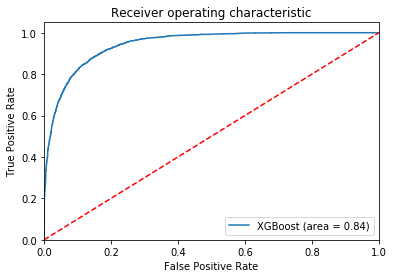

In [318]:
#ROC for  XGBoost
xgbc3_roc_auc = roc_auc_score(y_test, xgbc3.predict(X_test_lasso))
fpr, tpr, thresholds = roc_curve(y_test, xgbc3.predict_proba(X_test_lasso)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgbc3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()

In [327]:
# Build Naive Bayes model with selected features using Lasso selection
from sklearn.naive_bayes import BernoulliNB
gnb3 = BernoulliNB()
gnb3.fit(X_train_lasso,y_train)
y_pred_gnb = gnb3.predict(X_test_lasso)

In [328]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test_lasso.shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 12018 points : 2656


In [329]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 77.89981694125478


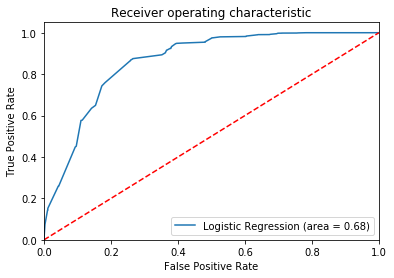

In [330]:
#ROC for Naive Bayes
gnb3_roc_auc = roc_auc_score(y_test, gnb3.predict(X_test_lasso))
fpr, tpr, thresholds = roc_curve(y_test, gnb3.predict_proba(X_test_lasso)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % gnb3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('nb_ROC')
plt.show()